In [1]:
# code is based on https://www.kaggle.com/code/arbazkhan971/lego-minifigures-classification-for-beginner

In [ ]:
import random
import os
import numpy as np
import torch
from fastai.vision.all import *

# data - get feeling

In [3]:
def seed_everything(seed=0):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything()
path = Path(os.path.join(os.getcwd(), 'data'))
lego_data = pd.read_csv(path/'index.csv', index_col=1)
lego_data.head()


,path
class_id,
1,marvel/0001/001.jpg
1,marvel/0001/002.jpg
1,marvel/0001/003.jpg
1,marvel/0001/004.jpg
1,marvel/0001/005.jpg


note you need to change the ´ to an ' symbol to enable utf8 formating

In [4]:
lego_metadata = pd.read_csv(path/'metadata.csv', index_col=0)
lego_metadata.head()

,lego_ids,lego_names,minifigure_name
class_id,,,
1,[76115],['Spider Mech vs. Venom'],SPIDER-MAN
2,[76115],['Spider Mech vs. Venom'],VENOM
3,[76115],['Spider Mech vs. Venom'],AUNT MAY
4,[76115],['Spider Mech vs. Venom'],GHOST SPIDER
5,[75208],"[""Yoda's Hut""]",YODA


note: remove class_id from columns

In [5]:
df_lego = pd.merge(lego_data, lego_metadata[['minifigure_name']], on='class_id')
df_lego['labels'] = df_lego['minifigure_name'].apply(lambda x: x.lower())
# df_lego['is_valid'] = df_lego['train-valid'].apply(lambda x: x == 'train')
df_lego['fname'] = df_lego['path']
df_lego.head()

,path,minifigure_name,labels,fname
class_id,,,,
1,marvel/0001/001.jpg,SPIDER-MAN,spider-man,marvel/0001/001.jpg
1,marvel/0001/002.jpg,SPIDER-MAN,spider-man,marvel/0001/002.jpg
1,marvel/0001/003.jpg,SPIDER-MAN,spider-man,marvel/0001/003.jpg
1,marvel/0001/004.jpg,SPIDER-MAN,spider-man,marvel/0001/004.jpg
1,marvel/0001/005.jpg,SPIDER-MAN,spider-man,marvel/0001/005.jpg


# data loading

In [6]:
data = ImageDataLoaders.from_df(df_lego, path, valid_pct=0.10,
                                   item_tfms=Resize(412),
                                   bs=10, num_workers=0, label_col="labels")

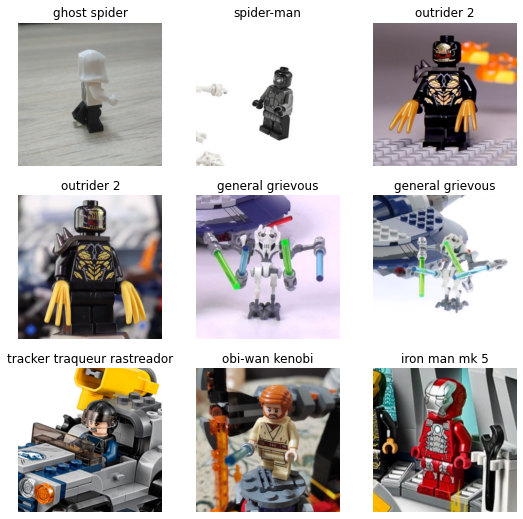

In [7]:
data.show_batch()

In [8]:
data

# training model

In [9]:
from torchvision.models import resnet50, ResNet50_Weights
os.environ['TORCH_HOME'] = 'models\\resnet' #setting the environment variable
resnet = resnet50(weights=ResNet50_Weights.DEFAULT)

In [10]:
learn = vision_learner(data, resnet50, metrics=[error_rate, accuracy], model_dir = Path(os.path.join(os.getcwd(),
                                                                                                   "models",
                                                                                                      "resnet")),
                       path =
Path(""
                                                                                                                    "."))

C:\Users\g7kaemj\.virtualenvs\mlops_zoomcamp_homework-RquHMC5G\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\g7kaemj\.virtualenvs\mlops_zoomcamp_homework-RquHMC5G\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# learn.lr_find()

In [ ]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(100,slice(lr1,lr2),cbs=EarlyStoppingCallback(patience=2))

In [ ]:
# understand predictions

In [ ]:
# save model 

# load model